
# Heart failure Prediction Dataset

### Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

### Attribute Information

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]</li>

 ## 2 Data Analysis

In [731]:
# libraries to be used for data analysis

import pandas as pd
import numpy as np

# Data Visualization libs

import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo- jonson transormatio
import scipy.stats as stats


In [732]:
%matplotlib inline

In [733]:
heart_df = pd.read_csv('./heart.csv')

In [734]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [735]:
heart_df.shape

(918, 12)

### 2.1 EDA

In [736]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### 2.2.1 lets get a feel of the data 

In [737]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### 2.2.2. Check if there are any NULL Values present in the dataset


In [738]:
heart_df.isna().all()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

Thats great we dont have any null values in our dataset

### 2.2.3. Next lets see the type of data we have

In [739]:
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [740]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [741]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [742]:
heart_df.shape

(918, 12)

In [743]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [744]:
heart_df.nunique()


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Dividing the data according to type for further feature engineering

1. **countinous**: Age, RestingBP, Cholestrol, MaxHR, Oldpeak
2. **Binary** : Sex, FastingBS, ExerciseAngina
3. **categorical** : ChestPaintype, RestingECG, ST_SLope

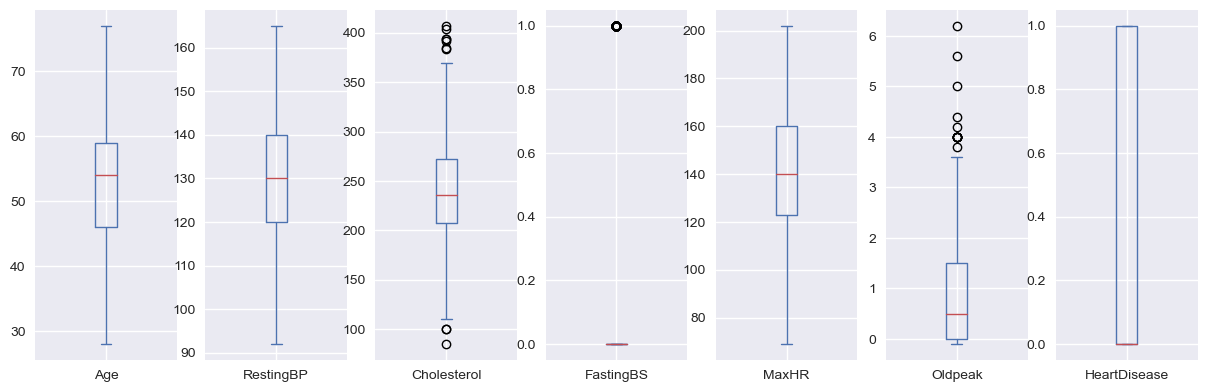

In [746]:
continuos_f = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
categorical_f = ["ChestPainType", "RestingECG", "ST_Slope"]
binaries_f = ["Sex", "FastingBS", "ExerciseAngina"]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35176\2413958896.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

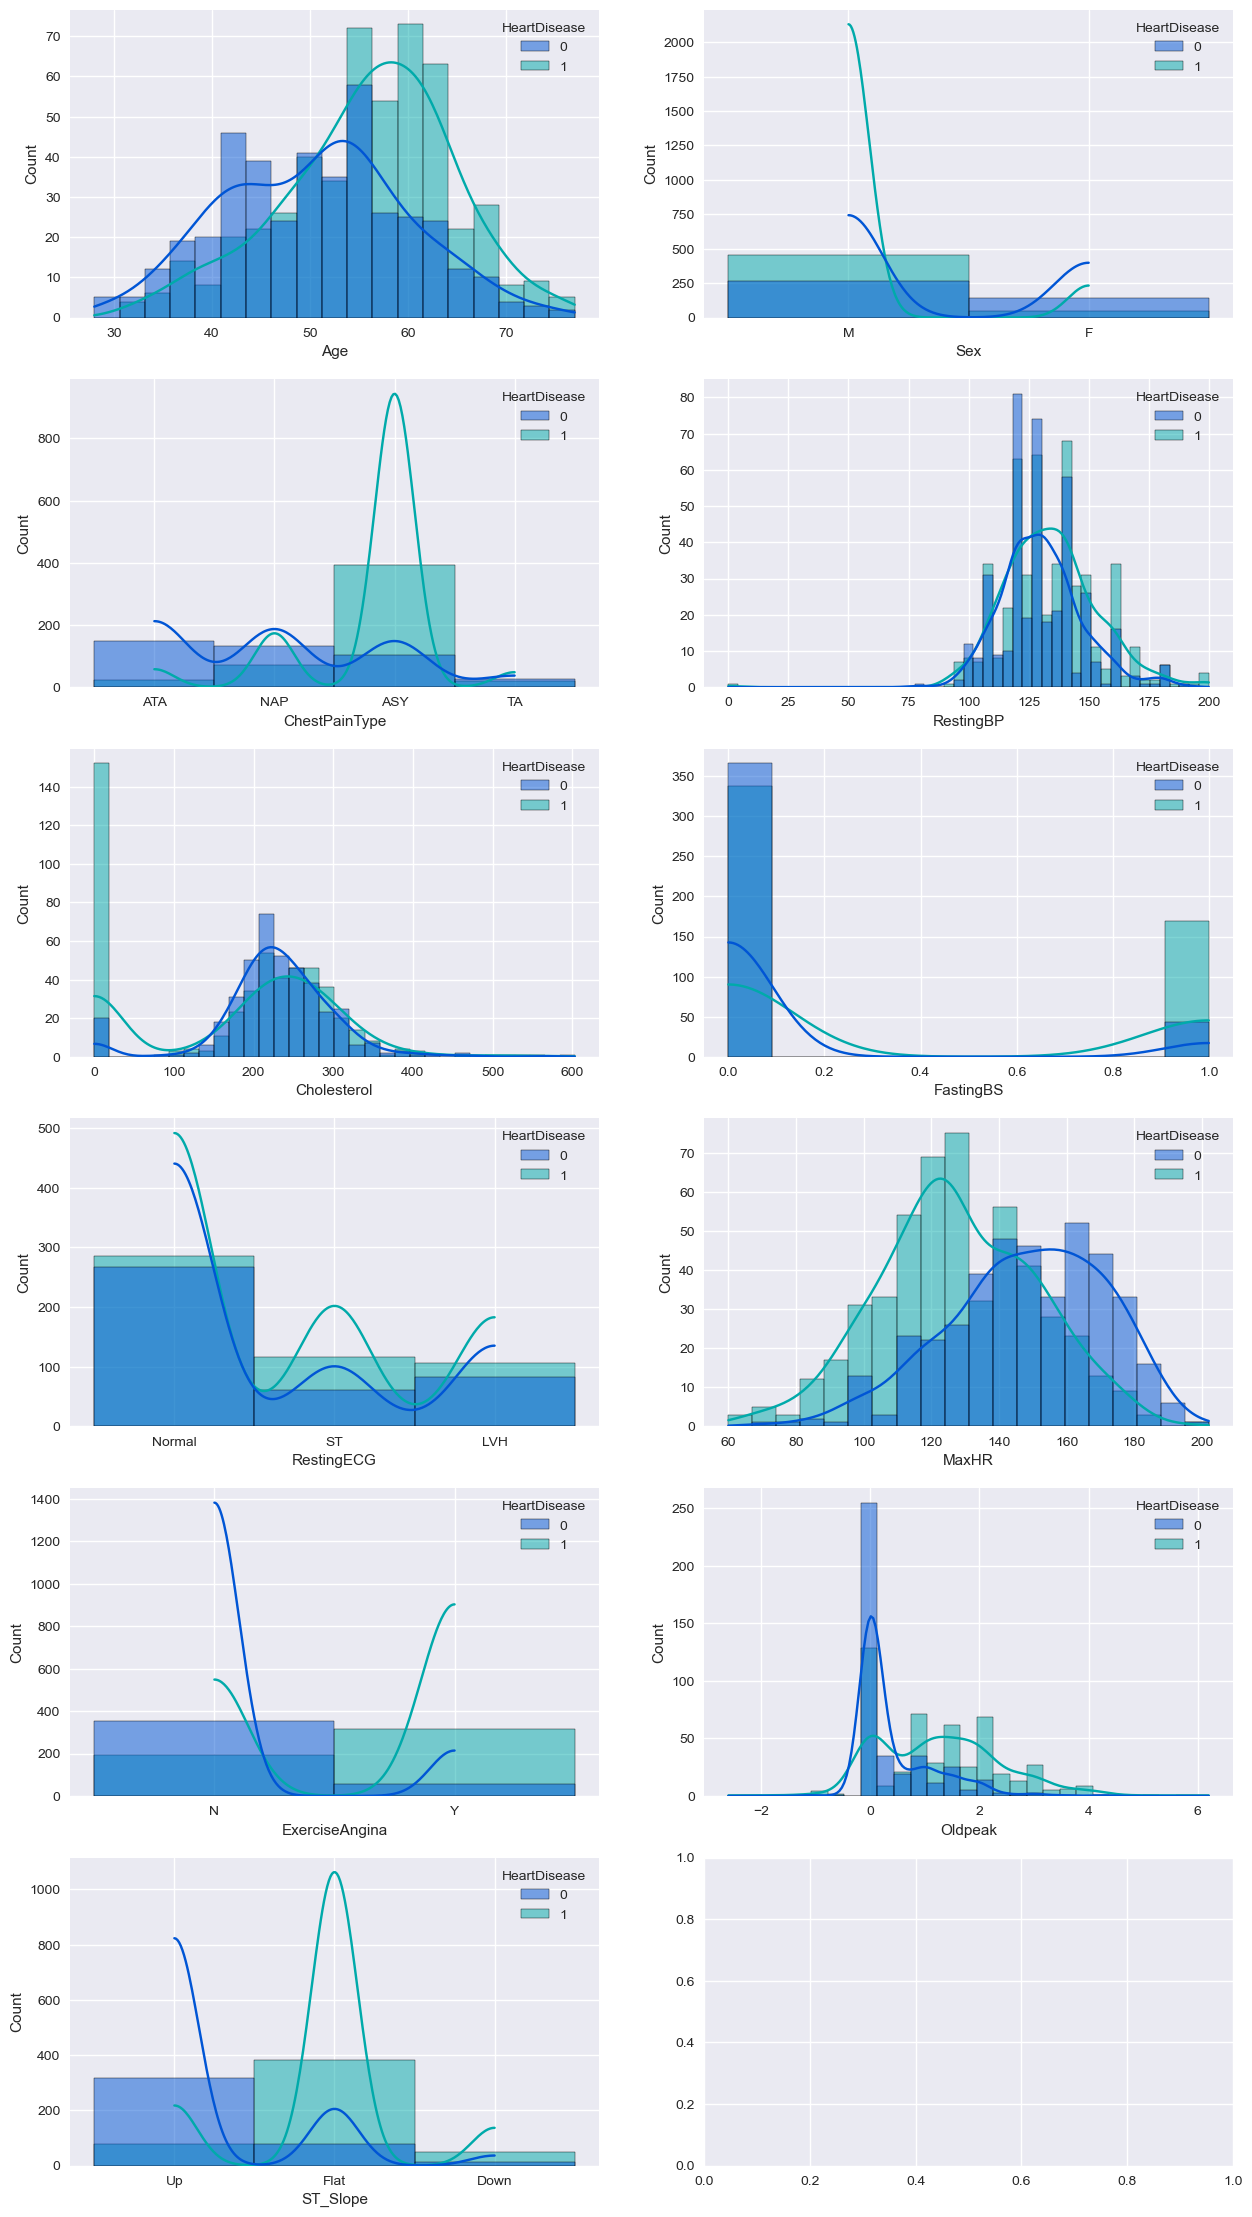

In [747]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)
color = 'winter'

fig, axs = plt.subplots(6, 2, figsize=(15,28))
i=1
for feature in heart_df.columns:
    if feature not in ["HeartDisease"] and i < 14:
        plt.subplot(6,2,i)
        sns.histplot(data=heart_df, x=feature, kde=True, palette=color, hue='HeartDisease')
        i+=1

### 2.1.1 Removing Outliers
From the above distribution we can notice that columns **Cholestrol** and **RestingBP** contain some outliers, Lets Deal With them.

        For shall use the IQR method to handle the outliers

**IQR** - *IQR basiccally sets the upper and lower threshold for a feature, above or below which is considered as an outliers*


   <img  src="https://editor.analyticsvidhya.com/uploads/12311IQR.png">




    capping the Outliers

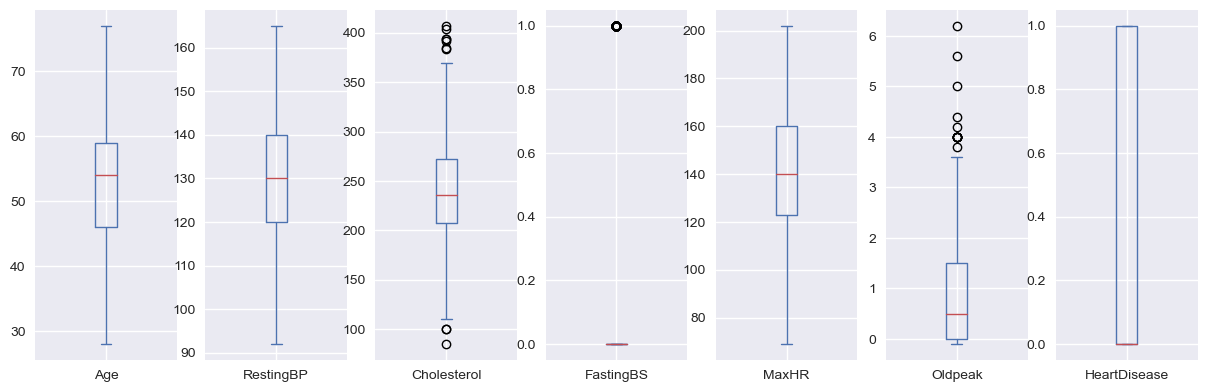

In [785]:
# Check for outliers
heart_df.plot(kind='box',subplots=True, sharex=False, 
        sharey=False,layout=(2, 7), figsize=(15,10));
       

<AxesSubplot: xlabel='Cholesterol'>

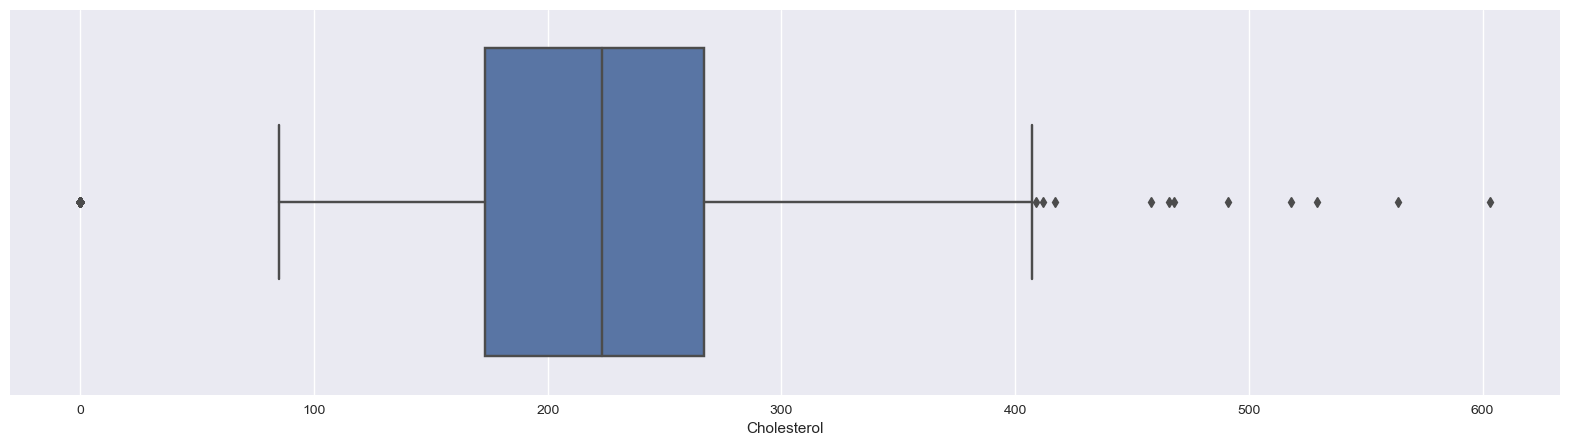

In [748]:
plt.figure(figsize=(20,5))
sns.boxplot(data=heart_df, x="Cholesterol")

<AxesSubplot: xlabel='Cholesterol', ylabel='Count'>

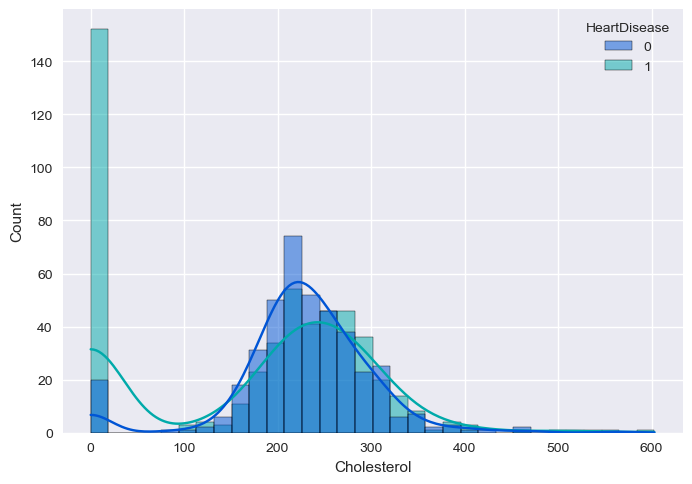

In [749]:
sns.histplot(data=heart_df, x='Cholesterol', kde=True, palette=color, hue='HeartDisease' )

In [750]:
# function to detect outliers

def detect_outliers(col):
    q1 = heart_df[col].quantile(0.75)
    q2 = heart_df[col].quantile(0.25)
    print(f'75th percentile: {q1}')
    print(f'25th percentile: {q2}')
    
    IQR = q1 - q2

    upper_lim = q1 + 1.5 * IQR
    lower_lim = q2 - 1.5 * IQR


    print(f"Upper: {upper_lim}")
    print(f"Lower: {lower_lim}")

  # sreies of data containg bool values , indicating if data in Or out interquantile range
    interval = ((heart_df[col] > q2 - 1.5 * IQR) & (heart_df[col] < q1 + 1.5*IQR))

    print(f'Interval: {interval}')
    return heart_df[interval], heart_df[~interval] # df[true],df [false]

    # return heart_df[interval],df[~interval]

######################################

# not_out_df   # not outliers
# df_out  # ouliers dataframe
# heart_df.loc[69, 'Cholesterol']


def assign_mean(df_out, not_df_out, label=None):
    heart_df.loc[df_out[df_out["HeartDisease"] == 0].index, label] = not_df_out[not_df_out["HeartDisease"] == 0][label].mean()
    heart_df.loc[df_out[df_out["HeartDisease"] == 1].index, label] = not_df_out[not_df_out["HeartDisease"] == 1][label].mean()
    return

    
def delete_outliers(df_out):
    return heart_df.drop(df_out.index)


In [751]:
not_out_df, df_out = detect_outliers('Cholesterol')
print(f'Outliers in cholesterol represent the {round((df_out.shape[0]*100)/heart_df.shape[0], 2)}% of our dataset')
# df_out_ch

75th percentile: 267.0
25th percentile: 173.25
Upper: 407.625
Lower: 32.625
Interval: 0      True
1      True
2      True
3      True
4      True
       ... 
913    True
914    True
915    True
916    True
917    True
Name: Cholesterol, Length: 918, dtype: bool
Outliers in cholesterol represent the 19.93% of our dataset


<AxesSubplot: xlabel='Cholesterol', ylabel='Count'>

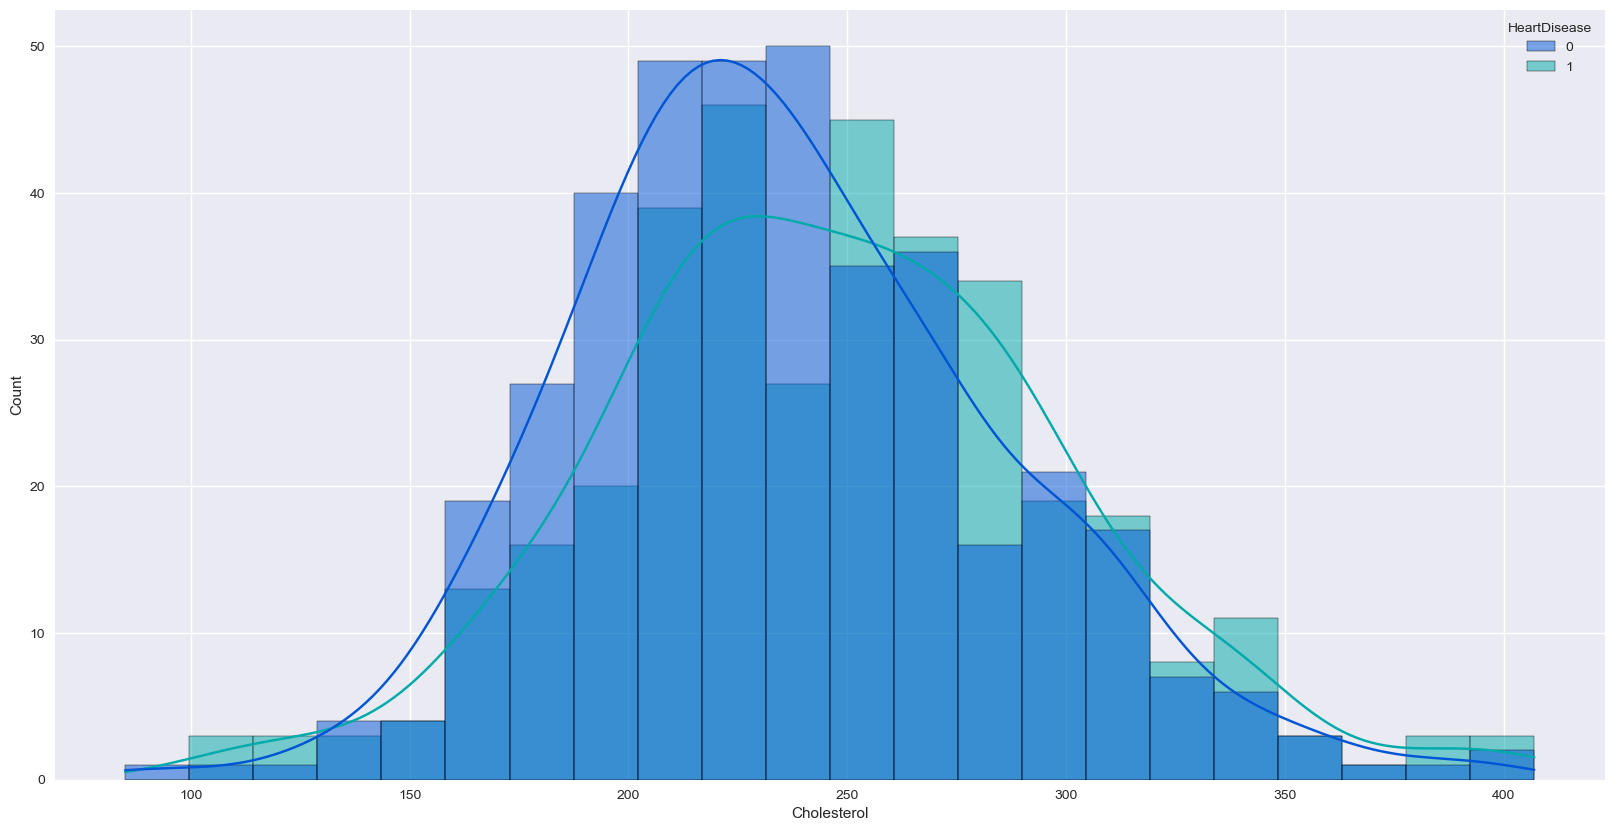

In [752]:
heart_df = delete_outliers(df_out[df_out["Cholesterol"] == 0])
assign_mean(df_out[df_out["Cholesterol"] != 0], not_out_df, 'Cholesterol')

plt.figure(figsize=(20,10))
sns.histplot(data=heart_df, x='Cholesterol', kde=True, palette=color, hue='HeartDisease')

Resting Blood Pressure outliers

<AxesSubplot: xlabel='RestingBP'>

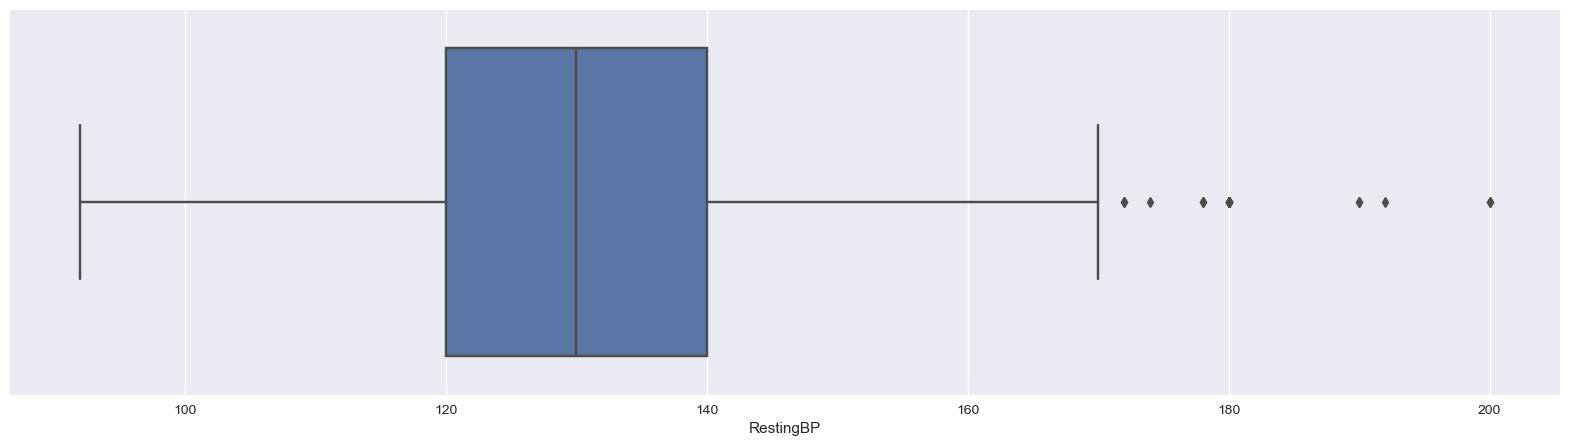

In [753]:
plt.figure(figsize=(20,5))
sns.boxplot(data=heart_df,x='RestingBP')


<AxesSubplot: xlabel='RestingBP', ylabel='Count'>

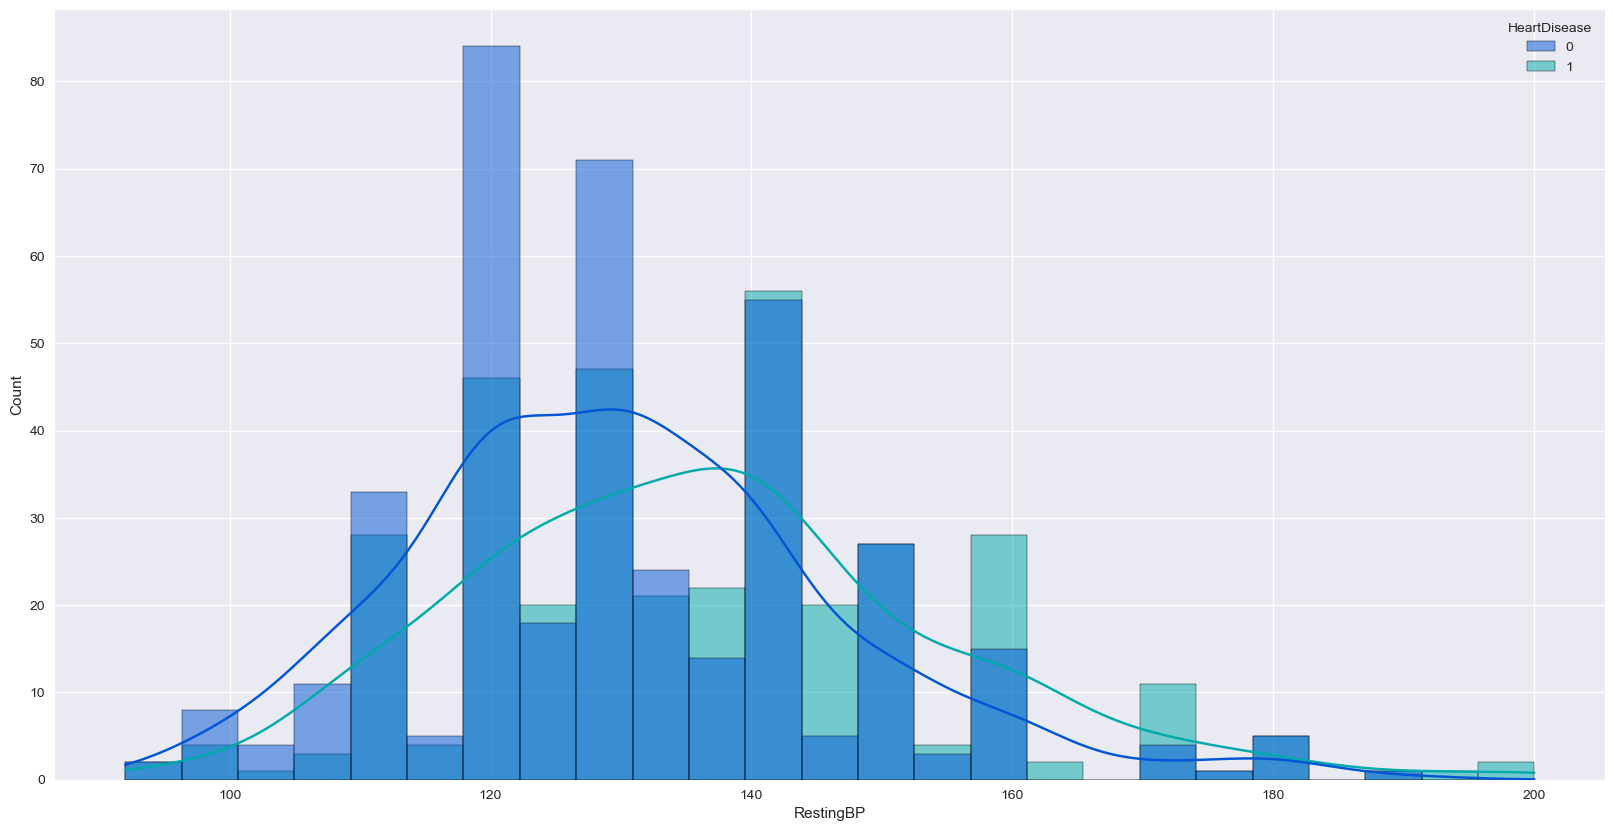

In [754]:
plt.figure(figsize=(20,10))
sns.histplot(data=heart_df, x='RestingBP', kde=True, palette=color, hue='HeartDisease')


Histplot shows some outliers in **RestingBP** and it also needs some scaling too

In [755]:
not_out_df_rb, df_out_rb = detect_outliers(col = 'RestingBP')
print(f'Outliers in RestingBP represent the {round((df_out_rb.shape[0]*100)/heart_df.shape[0], 2)}% of our dataset')


75th percentile: 140.0
25th percentile: 120.0
Upper: 170.0
Lower: 90.0
Interval: 0      True
1      True
2      True
3      True
4      True
       ... 
913    True
914    True
915    True
916    True
917    True
Name: RestingBP, Length: 746, dtype: bool
Outliers in RestingBP represent the 4.29% of our dataset


<AxesSubplot: xlabel='RestingBP', ylabel='Count'>

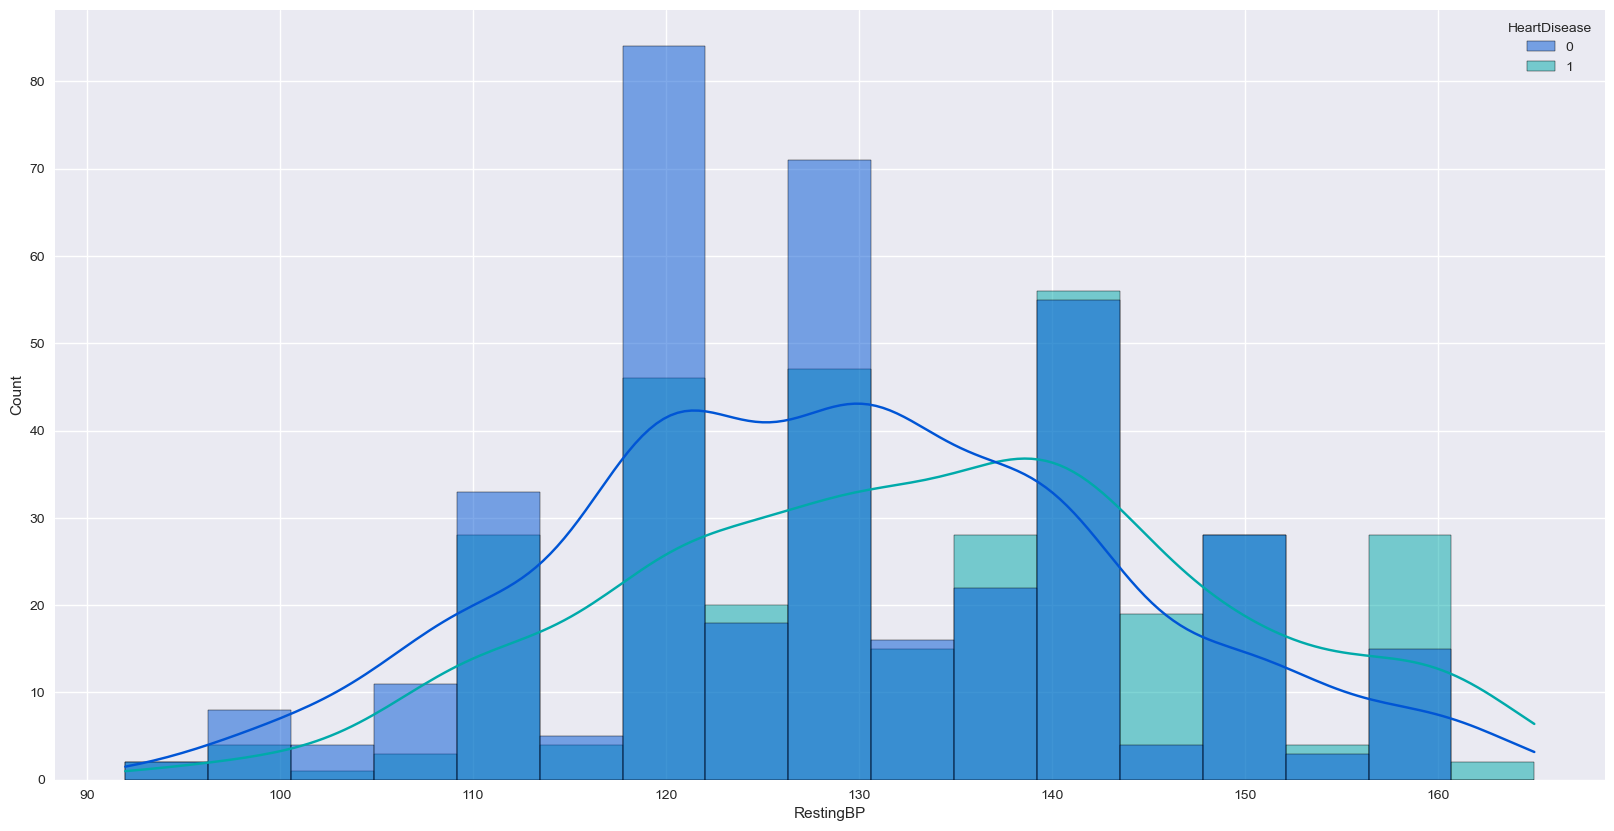

In [756]:
heart_df = delete_outliers(df_out_rb)
plt.figure(figsize=(20,10))
sns.histplot(data=heart_df, x='RestingBP', kde=True, palette=color, hue='HeartDisease')

## Handling categorical Data

In [757]:
# returns a list of catagorical col

cat_val = [cat for cat in heart_df.columns if heart_df[cat].dtype == 'object']

In [758]:
cat_val

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [759]:
def encode(cat_val):
    dataset = pd.DataFrame()
    for i in cat_val:
        df_cat = pd.get_dummies(heart_df[cat_val])
        dataset=pd.concat([dataset,df_cat],axis=1)
    return df_cat

In [760]:
df_cat = encode(cat_val)

In [761]:
final_df = heart_df.copy()

In [762]:
final_df.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope' ],axis=1,inplace=True)

In [763]:
final_df = pd.concat([final_df,df_cat],axis=1)

In [764]:
# final_df = final_df.drop(['HeartDisease'],axis=1,inplace=True)

In [765]:
final_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214.0,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195.0,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193.0,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131.0,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236.0,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [766]:
final_df.drop(['HeartDisease'],inplace=True,axis=1)

In [767]:
X = final_df
y = heart_df['HeartDisease']

In [768]:
final_df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,52.705882,131.021008,239.968803,0.162465,140.519608,0.882073,0.240896,0.759104,0.491597,0.224090,0.232493,0.051821,0.233894,0.605042,0.161064,0.623249,0.376751,0.051821,0.471989,0.476190
std,9.504722,14.671852,50.379553,0.369135,24.384203,1.057645,0.427927,0.427927,0.500280,0.417274,0.422718,0.221820,0.423602,0.489184,0.367848,0.484911,0.484911,0.221820,0.499565,0.499783
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,120.000000,207.000000,0.000000,123.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,235.923377,0.000000,140.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,140.000000,272.000000,0.000000,160.000000,1.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,165.000000,407.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Prep

In [769]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,confusion_matrix,classification_report

In [770]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.337734,0.612417,0.973918,0,1.291921,-0.834582,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.390172,1.976527,-1.191175,0,0.635298,0.111578,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1.653588,-0.069638,0.854739,0,-1.744958,-0.834582,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.495457,0.476006,-0.515824,0,-1.334569,0.584658,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.136251,1.294472,-0.893226,0,-0.760024,-0.834582,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [771]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [772]:
test_scores = []
train_scores = []

for i in range (1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [773]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [774]:
## score that comes from testing on the same datapoints that were used for training
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 87.41258741258741 % and k = [11]


In [775]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8671328671328671

In [776]:
params =[{'kernel':('linear', 'rbf'),'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]


In [777]:
prediction = knn.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[61  5]
 [14 63]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.87        66
           1       0.93      0.82      0.87        77

    accuracy                           0.87       143
   macro avg       0.87      0.87      0.87       143
weighted avg       0.87      0.87      0.87       143



### Hyperparameter Optimisation

In [778]:

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))


Best Score:0.8529104698118782
Best Parameters: {'n_neighbors': 15}


In [780]:
import joblib

In [781]:
joblib.dump(rfc, 'Random_forest_heart.joblib') 

['Random_forest_heart.joblib']